# INDIAN INSTITUTE OF INFORMATION TECHNOLOGY DHARWAD

# SENTIMENT ANALYSIS OF TWITTER DATA USING ML TECHNIQUES

## BY 
##                Y SANTHI SWARUP - 18BEC051 - 18bec051@iiitdwd.ac.in

##                N NIKHIL KUMAR - 18BEC051 - 18bec031@iiitdwd.ac.in

##                M VINOD - 18BEC027 - 18bec027@iiitdwd.ac.in





### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import nltk
import re
import pycountry
import os
import string
import csv
import tweepy as tw
import warnings
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
warnings.filterwarnings('ignore')

In [2]:
import json
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [3]:
pd.set_option('display.max_columns', None)

## Data Acquisition

In [4]:
#add your twitter developer account access and consumer keys
consumer_key= "----------------"
consumer_secret= "-------------------"
access_token= "-----------------------------"
access_token_secret= "----------------------------"

In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Define the search term and the date_since date as variables
search_words = "#Windows11"

In [7]:
new_search = search_words + " -filter:retweets"
new_search

'#Windows11 -filter:retweets'

In [8]:
csvFile = open('tesst.csv','wt', encoding="utf8")

#Use csv writer
csvWriter = csv.writer(csvFile)
header =  ["date-time","tweetdata","username","location"]
csvWriter.writerow(header)
for tweet in tw.Cursor(api.search,
                           q = new_search,
                           since = "2021-10-01",
                           until = "2021-11-18",
                           lang = "en").items(2000):

    
    csvWriter.writerow([tweet.created_at, tweet.text,tweet.user.screen_name, tweet.user.location])
    print(tweet.created_at, tweet.text,tweet.user.screen_name,tweet.user.location)
csvFile.close()

2021-11-17 08:04:14 Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP Piceasoft 
2021-11-17 08:03:14 ✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare
#windows11… https://t.co/LnAXwhrP6D vikram0502 New Delhi, India
2021-11-17 08:01:49 ✅ How To Start Windows 11 in Safe Mode With Networking
#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu vikram0502 New Delhi, India
2021-11-17 08:00:19 #Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide TferThomas Brisbane, Australia
2021-11-17 08:00:03 Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪

When it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC WindowsUK UK
2021-11-17 08:00:01 ✅ How To Sleep Windows 11 Computer or Laptop
#sleep #sleepcomputer #sleepwindows11 #windows11 #VikramKumarSingh… https://t.co/OyO

2021-11-17 05:00:16 Next #Windows11 update makes the Blue Screen of Death blue again https://t.co/w5kU5nO1Vv godfree_kd Planet Earth, Milky Way Galaxy
2021-11-17 04:52:04 Windows 11 New Media Player begins rolling out to Windows Insiders in DEV Channel.

This New Media player replaces… https://t.co/hbJjtnsgVg TechBlitz5 
2021-11-17 04:41:24 @WindowsInd @SamsungMobile very nice integration of samsung phone with #Windows11 via #yourphone app. screen shot i… https://t.co/z3EbOWVDrb nair_san ÜT: 22.30036,73.162619
2021-11-17 04:40:32 The rumors were true: Windows 11 is getting a beautiful new media player - https://t.co/zPUr76Gfn4

More curated ne… https://t.co/WgPbQnqJdz sounds_nerdy 
2021-11-17 04:40:04 How to Install Multiple Apps on Windows 11 (Step-by-step Guide) https://t.co/Bqx3Oy8vjO #Computer #Howto #Windows… https://t.co/QmzvwxdO5P AcooEdi Canadá
2021-11-17 04:39:56 My Desktop updated to Windows 11 👍

And, #Windows11 looks good (as of now) https://t.co/VqM3kOJCL4 yskanth విజయవాడ


2021-11-16 23:20:00 Need a #productivity boost? Give these #Windows11 #multitasking features a try https://t.co/EAMqrG8Hmi via @CNET techhelpkb San Francisco, CA, USA
2021-11-16 23:00:56 #Microsoft is increasing the pace of the #Windows11 rollout, broadening availability

"The company said it expected… https://t.co/nurcRPnxT5 Bridg8Soft Lakewood Ranch, FL
2021-11-16 23:00:20 OFFICE HOURS REMINDER!!! DO YOU HAVE ANY QUESTIONS? Join us this WEDNESDAY 17 🕓6:00 - 7:00PM CDT for Q&amp;A and roundt… https://t.co/gIBDYSWxd1 viamonstra 
2021-11-16 22:55:27 Hands on with Windows 11’s new Media Player
https://t.co/i8VaQe7RL3 #Windows11 https://t.co/Gk8HQKVOw2 WindowsLatest USA
2021-11-16 22:43:50 I’m hands-on with my PC. #Windows11 and a touch screen are a perfect match for me. bayley200213 
2021-11-16 22:40:09 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 moremscarlie For You page
2021-11-16 22:38:06 I’m hands-on with my PC. #Windows11 and a touc

2021-11-16 19:56:59 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme if I get #Windows11 cowfricker he/him
2021-11-16 19:54:11 I've got a new Lenovo review laptop to play with: a nifty little Yoga 7i. It shows itself "#Windows11 ready" in a m… https://t.co/0HUNENbxel EdTittel Round Rock, TX
2021-11-16 19:45:41 On the GitHub repo you can see a list of the features planned for 1.1, like push notifications (in GA), multiple wi… https://t.co/u6XBMgsDZM qmatteoq Como
2021-11-16 19:44:08 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 leemoinvader Follow me or else : )
2021-11-16 19:43:58 Realtek High Definition Audio drivers 6.0.9247.1 ☑️
https://t.co/8VWR81kyK7
⬆️
#Realtek #Windows10 #Windows11 devDRIVERS_ru 
2021-11-16 19:41:19 What part of RadioDJ isn't officially supported on #windows11 do people not grasp? BaldyRadio Harpurhey, Manchester UK
2021-11-16 19:34:39 It's available !!! 

#windows11

2021-11-16 18:00:02 With refreshed apps and visual updates that elevate user engagement, the new #Windows11 experience was reimagined w… https://t.co/CjFrhW1cXX MicrosoftJordan Amman, Jordan
2021-11-16 18:00:02 With refreshed apps and visual updates that elevate user engagement, the new #Windows11 experience was reimagined w… https://t.co/62KHCg28DA ms_pakistan Pakistan
2021-11-16 18:00:01 With refreshed apps and visual updates that elevate user engagement, the new #Windows11 experience was reimagined w… https://t.co/RlsleYZBwy MicrosoftLB Lebanon
2021-11-16 17:49:42 [#WINDOWS11|#UBUNTU|#DUALBOOT]
How to dual-boot Ubuntu and Windows 11 (by @AddTips):
https://t.co/Qi9pFiIenI https://t.co/LeC4TEyqMv secou Paris, France
2021-11-16 17:48:18 onmsft: Microsoft opens first 100% carbon free energy datacenter region in Sweden https://t.co/yPOMTGV3QC #Microsoft #Windows11 #Windows DavShanahan Massachusetts, USA
2021-11-16 17:41:56 How to Enable or Disable Always On Top for #WindowsTerminal in #W

2021-11-16 15:04:55 Full Dark Round And Squares Theme For Windows 11 
Get it here: https://t.co/buGYzY699U 
#Ubuntu #FreeFire… https://t.co/AOEKS6xXTi cle0desktop 
2021-11-16 15:04:33 TODAY's DEAL
HP 17.3" FHD, Intel Core i5-1135G7, 8GB RAM, 512GB SSD, Natural Silver, Windows 11 Home, 17-by4061nr
4… https://t.co/hWj9UP95Fu doidealsnow United States
2021-11-16 15:02:15 Windows 11, whose dumb idea it is to put the copy and paste option on the 2nd menu when right click? #microsoft #Windows11 dorohlez 
2021-11-16 14:57:53 Published at MSC

Run Linux Apps on Windows using Windows Subsystem for Linux
https://t.co/TQLXkhkfdJ

#Windows11… https://t.co/K9xBcPu8KL _sumitdhiman Panchkula, India
2021-11-16 14:56:02 Well, look what appeared today on Windows Update. I wonder if I should take the plunge and update my Dell XPS deskt… https://t.co/T87MvpgRre Bob_Allan1 Toronto, Canada
2021-11-16 14:54:12 onmsft: Four new ID@Xbox games to launch day one on Xbox Game Pass later this month https://t.co/zS

2021-11-16 11:02:05 Read about how Windows 11 users will be compelled to use Microsoft edge.  #microsoftoffice365 #appdeveloper… https://t.co/9HDhRjsVMJ ITCompany_Co Sydney, Australia
2021-11-16 11:00:00 With refreshed apps and visual updates that elevate user engagement, the new #Windows11 experience was reimagined w… https://t.co/5hSvTSvxV8 MicrosoftAfrica Africa
2021-11-16 11:00:00 With refreshed apps and visual updates that elevate user engagement, the new #Windows11 experience was reimagined w… https://t.co/BSiQ2wpcRW Microsoftea East Africa
2021-11-16 11:00:00 With refreshed apps and visual updates that elevate user engagement, the new #Windows11 experience was reimagined w… https://t.co/kauFvOYC6w MicrosoftNG Nigeria
2021-11-16 10:40:35 Oh no .. no #windows11 for me 😥 https://t.co/F7Mqf7eB61 dustynlightfoot 
2021-11-16 10:36:10 @Windows Keeping fingers crossed. Hope it goes through without errors #Windows11 https://t.co/Vd9G2Nfdon maddyvoldy Bangalore
2021-11-16 10:29:36 Enable 

2021-11-16 06:51:47 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11. (I alre… https://t.co/R8lvuKUXUs Itslex_GG Comunidad de Madrid, España
2021-11-16 06:39:25 How was your upgrade to #Windows11 from #Windows10?

Any issues? ashgtx Bengaluru South, India
2021-11-16 06:36:05 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 DuongNguyen_o3o Hồ Chí Minh, Việt Nam
2021-11-16 06:27:34 #Windows11 is stunning! Got the update today.
#microsoft  #Windows11 https://t.co/Z8gQKiRoco nitindominic5 Fargo, ND, USA
2021-11-16 06:21:10 Holy, it worked!!
#noTPM #Windows11 https://t.co/Cj96pvtXVB iamnottomgreen BC, Canada
2021-11-16 06:12:57 going to restart.... #Windows11 https://t.co/V4IyuQgTRO kareemsulthan07 India
2021-11-16 06:10:02 Windows 11 : le Blue Screen of Death est de retour https://t.co/C1zOf8w8oJ #Windows11 #BSoD #Microsoft https://t.co/JFWBa5iXwe GNT_fr France
2021-11-16 05:

2021-11-15 22:42:07 2 Best Ways to Format a Drive On Windows 11 https://t.co/YJXMm7KJVX #Howto #Windows #FormataDrive #HowTo #Windows11… https://t.co/TMBBYCSpU0 AcooEdi Canadá
2021-11-15 22:41:51 This is the new WhatsApp UWP app for Windows 11 and Windows 10 https://t.co/uzjY8Gkxb9 #Windows11 https://t.co/rRgjs6cxu6 WindowsLatest USA
2021-11-15 22:40:30 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 Norno Windsor, CT
2021-11-15 22:36:15 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 epicgaming881 
2021-11-15 22:34:24 Do you have your badge already?

#Windows11 #WindowsInsider @windowsinsider https://t.co/e4snWK64Ri WINsidersDE Deutschland
2021-11-15 22:33:40 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 AznburInnit 
2021-11-15 22:31:11 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme 

2021-11-15 18:19:11 The global #TeamsMute in #Windows11 is a huge feature add!

https://t.co/uCAewO101p https://t.co/JW6uA3uDKN TheBeehammer Dayton, OH
2021-11-15 18:16:13 New blog post: How to create a custom image for Windows 365 Enterprise Cloud PCs.

"In this blog post I will add la… https://t.co/yhzVl6eW3M SuneThomsenDK Denmark
2021-11-15 18:14:43 How to Enable or Disable Boot Log in #Windows11 
https://t.co/Li21l2JDJc Shawn_Brink_MVP 
2021-11-15 18:12:59 My #DellXPS9500 used to be a great laptop, until #Windows11. Thanks @Microsoft @Dell mikebc23 Santa Ana, Costa Rica
2021-11-15 18:09:12 Windows 11 is cool and all, but I miss that one feature where I could take a peek at what's inside a folder without… https://t.co/Lf0TZk6bki geiiteaa_ 
2021-11-15 18:08:29 Don't miss this! Thursday. Answers to your questions - LIVE - from the engineers building #MSIntune, #ConfigMgr,… https://t.co/9dQGp9PhvI MSWindowsITPro Redmond, WA
2021-11-15 18:00:10 1️⃣  Settings
2️⃣  System
3️⃣  Display 
4️

2021-11-15 14:46:14 So, #Microsoft @surface any idea when I'll see a Studio 3 so I can give you more money, or could you talk to your f… https://t.co/OWKK2sbmSF bpiatt San Antonio, Tx
2021-11-15 14:41:04 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 realSandyDog Hollywood/Toontown/Angel Grove
2021-11-15 14:38:52 onmsft: Microsoft blocks EdgeDeflector, an app that makes it easy to not use Microsoft Edge in Windows 11… https://t.co/s04zdEsekj DavShanahan Massachusetts, USA
2021-11-15 14:37:33 Microsoft blocks EdgeDeflector to force Windows 11 users into Edge
https://t.co/zsseVpw1Ft

#windows11… https://t.co/ICWKp3yEz4 tryingBot05 NY
2021-11-15 14:34:01 What's News at D&amp;H:
• #Windows11 is here &amp; designed for #hybridwork.
• #XaaS configurator tool = painless quotes bu… https://t.co/oGjR8xnc1T dandh Harrisburg, PA
2021-11-15 14:33:21 onmsft: A look back at 20 years of Xbox ahead of today’s special anniversary event https://t.co/EgmxMz

2021-11-15 11:06:33 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 jayed_al_sabit 
2021-11-15 11:03:13 Visit our secure web store for buying software keys with free support
#Windows11 #Windows10 #activationkey #oem… https://t.co/nQTpf01NAK MSoftwarekey 
2021-11-15 11:01:43 @TheXclusiveAce No issues for me so far, #windows11 with the latest Nvidia drivers. Hope you get your issues sorted… https://t.co/Kxh8SuFPeY StarkyGuy Qatar
2021-11-15 11:00:18 Sync your favorites, passwords, settings, and more across any device you’re on — including #Windows11 💙… https://t.co/RtuYqRqaBV Microsoftea East Africa
2021-11-15 11:00:18 Sync your favorites, passwords, settings, and more across any device you’re on — including #Windows11 💙… https://t.co/HtSx5yyX82 MicrosoftAfrica Africa
2021-11-15 11:00:18 Sync your favorites, passwords, settings, and more across any device you’re on — including #Windows11 💙… https://t.co/Ke7LuAj2wB MicrosoftNG Nig

2021-11-15 08:17:45 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 janamejeya കൊച്ചി
2021-11-15 08:16:58 Hi, is there an option to add #labels to individual files in #windows10, or is there an app that I can use?
or like… https://t.co/LUAu3no8Qg devanshahujaa_ Mumbai, India
2021-11-15 08:14:08 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 mryesyum 
2021-11-15 08:12:37 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 that_chand Gujarat, India 
2021-11-15 08:07:57 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 sabharishcule 
2021-11-15 08:05:05 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 Rakesh237649143 Malaysia
2021-11-15 08:04:32 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m goin

2021-11-15 03:09:14 Don’t think I’m out of touch just for preferring a mouse. I use #Windows11 my way and it works for me. EnderRenderer Chernobyl
2021-11-15 03:07:08 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 fanscott1234 Pittsburgh, PA
2021-11-15 03:01:29 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 d_heyne 
2021-11-15 02:51:21 Updating to #Windows11 🤞🤞 https://t.co/FQDd4mznlK Srikar_tweetz India
2021-11-15 02:51:12 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 Gsgirl0855 OKC
2021-11-15 02:33:39 5 Windows File Explorer Alternatives You Should Try
https://t.co/9Zm5PYeWy0

#windows11 #windows10 #apps #microsoft #technology tryingBot05 NY
2021-11-15 02:24:37 is @clipstudiopaint optimized for windows 11 yet? i've updated to Win 11 and CSP Paint seems to have a lag on the h… https://t.co/VNFexLfpsM dezmogabut 
2021-1

2021-11-14 20:34:55 Very unhappy to read #Windows11  will block 3rd party browsers.  Time for Mint !  Bullies! SacScotty Sacramento
2021-11-14 20:20:12 #Windows11 is feeling blue again...
Ars Technica: Next Windows 11 update makes the Blue Screen of Death blue again.
https://t.co/0j9tq0H07V thatwindowsgeek New York
2021-11-14 20:08:11 I prefer a look that’s easy on the ass *and* easy on the balls. I already use #Windows11 Timaso_Chomp 
2021-11-14 20:06:16 #Windows11 #impressions

Read: https://t.co/e85oj0NcYN firoz_usf Dhaka,Bangladesh
2021-11-14 20:00:11 How to Add or Remove Turn on #BitLocker context menu in #Windows11 
https://t.co/ImgzaVNpUm Shawn_Brink_MVP 
2021-11-14 19:37:04 #Windows11 vs. #Window10: Everything Microsoft changed in the latest OS https://t.co/tCHkC5kM6t #TechJunkieNews https://t.co/r6bAnBx4bi techjunkiejh 
2021-11-14 19:29:46 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 1991ForAiur Blinding Lights, Meteora
2021-11

2021-11-14 12:39:54 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 PeymanTajik Turkey-Istanbul
2021-11-14 12:39:07 #Microsoft #Windows11 @Windows I am so excited to upgrade from windows 10 to windows 11 😍😍😍 https://t.co/LJ4TshhFNx ashwagalsalhi Al Khobar, Kingdom of Saudi Arabia
2021-11-14 12:33:43 Upgrading... 

#Windows11 https://t.co/hctwgEoKca amoltangade PID1
2021-11-14 12:19:07 I think I love what it looks like to be on Windows 11 so far. Its user interface has changed a lot and I often get… https://t.co/VWNunNhCxg Masakiss1 
2021-11-14 12:04:14 @Windows LockScreen #Windows11 https://t.co/GgOSCPZPvm jr79_gyana 
2021-11-14 11:51:14 Your take on #Windows11 Dr. Cooper? https://t.co/mjBihXBVoC Py_M2000 
2021-11-14 11:43:48 ✅ How To Swap Action Of Left And Right mouse Buttons On Windows 11
#mouseleftorright #mousebuttonsswapaction… https://t.co/qIoGMB4e5s vikram0502 New Delhi, India
2021-11-14 11:42:04 ✅ How To Install RSAT: 

2021-11-14 05:55:15 How to Speed up #Windows11 and Improve Its Performance https://t.co/V1PssKm886 by @minitool_ peterjmsimons Europe
2021-11-14 05:43:50 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 DanaScullyMulde West Michigan/Mulder's arms
2021-11-14 05:39:27 Finally getting to the real issues.
#Windows11 https://t.co/sTbKSAmjI2 TFox 
2021-11-14 05:37:38 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 Fiatbroke Miami, FL
2021-11-14 05:37:16 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 AirSnake_XM 
2021-11-14 05:32:53 Fixing Microsoft Word Always Crashes in Windows 10/11 #Microsoft #Word #Crash #Error #Windows10 #Windows11… https://t.co/E85beX2Jbl CSA_DVillamizar Envigado, antioquia
2021-11-14 05:31:12 Neu im Store: #Tubi - Free Movies and TV

– https://t.co/uzTk5Ak9Q5

#App #MicrosoftStore #New #Windows10 #Windows1

2021-11-13 23:22:50 I hope they change their mind about this and that they can still let me decide which browser to use by the time I g… https://t.co/hNUIDx1RZS ItsDidrick Bergen, Norway
2021-11-13 23:21:07 Dark mode all the way, I already have it! :D #Windows11 _saturnway 
2021-11-13 23:12:55 Register Today! Join us online Tue Nov 16 from 6:30-8:00 pm for Windows 11 for the Modern Worker with MS MVP Kevin… https://t.co/1l7bPCPlyx calgaryitpro Calgary AB CANADA
2021-11-13 23:03:49 Windows 11　#Windows11 🐸 https://t.co/NTeFwrO6iO hirokun_sn Minami-Tohoku
2021-11-13 22:58:23 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 shindiginspace Ichiraku Ramen
2021-11-13 22:57:47 #Windows11 Will Soon Block All Default Browser Workarounds https://t.co/78t4OrqSx7 by @howtogeek peterjmsimons Europe
2021-11-13 22:51:30 No Registration or Account Login is Required... 😎 😍

https://t.co/6uFTEJpEJq

#NEWS #NewShot #NEWSUPDATE #tech… https://t.co/r

2021-11-13 19:15:59 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 mharkhisio Sekondi Takoradi, Ghana
2021-11-13 19:11:03 Windows 11

Specifications, requirements,,,,

How to install Windows 11 for free

#Windows11 #Windows #webtechland… https://t.co/Rp4OUPLqLr elearnblogging Chandigarh, India
2021-11-13 19:10:09 Tech Buzz: @Microsoft has released a new preview of #Windows11 giving users the ability in the #MSTeams meetings ap… https://t.co/QzUG7FcPRi Entisys360 Concord, Calif.
2021-11-13 19:07:58 Well done #Windows11 team. I upgraded today in about 10 minutes with no issues. That is how  it is done. bobwardms North Richland Hills, Texas
2021-11-13 19:05:35 How to Hide #OneDrive Images in the #Windows11 #Photos App https://t.co/c2aFtd0VsJ by @howtogeek peterjmsimons Europe
2021-11-13 19:03:08 Windows 11

Specifications, requirements,,,,

How to install Windows 11 for free

#Windows11 #Windows #webtechland

https://t.co/jBAyHio

2021-11-13 14:01:58 Though it's a shame I cannot keep my Win XP theme I was going for when I was in Windows 10! ^^" #Windows11 MJMusselwhite88 Chelmsford
2021-11-13 13:56:47 Wouldn't it be better to just focus on getting Windows 11 more lightweight? 

#windows #linux #DEVCommunity #coding… https://t.co/ydJoVZq2EX Noberg4 
2021-11-13 13:56:00 This issue is fixed in #Windows11 build 22000.346 [Available in Beta and RP Channel]. Thanks @windowsinsider https://t.co/xiNwigw0qQ D_Avinash_K Hyderabad, India
2021-11-13 13:45:34 Finally I got my Windows 11 shipment badge #Windows11 
#WindowsInsiders
Thanks @windowsinsider https://t.co/n90DNBV0rg Abo_Omar 
2021-11-13 13:42:01 The ultimate guide to clean installing #Windows11 on your PC https://t.co/zz1z9mrs0y peterjmsimons Europe
2021-11-13 13:41:52 New 2D emojis in #Windows11 build 22000.346. It would have been amazing if it's in 3D style. Still better than befo… https://t.co/3KbzTxl0x4 D_Avinash_K Hyderabad, India
2021-11-13 13:40:00 ICYM,Micr

2021-11-13 09:08:17 Oh joy my @kensington fingerprint scanner doesn't work with #Windows11. Back to typing in passwords to unlock things :-( melodiouscode UK
2021-11-13 09:03:09 What is PWA software and how to install it... 😊

https://t.co/4rUyo9YnSN

#news #NEWSUPDATE #NewsUpdates #tech… https://t.co/SvHvv7JbS4 SSuiteSoftware Planet Phloston, Angel Galaxy
2021-11-13 08:56:10 Latest #Windows11 overrides attempts to avoid using Edge https://t.co/7s1U2ug3Uu by @TheRegister peterjmsimons Europe
2021-11-13 08:56:03 Windows 11 performance overwhelms Linux on Intel 12th Gen Alder Lake-S Core i9-12900K PC #WindowsvsLinux #Windows11… https://t.co/KgVf9HgThF NeowinFeed Plymouth, MI
2021-11-13 08:42:23 @Windows Any news on adding @AMDRyzen 2500u to the list of supported CPUs. The CPU supports all the prerequisites f… https://t.co/FWdMHO9psg sagar_sureliya Mumbai, India
2021-11-13 08:40:07 With Windows 11 updates already available, Cubicost TAS and or TRB users who used Windows 10 don't have to w

2021-11-13 02:33:01 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 Datcyde NYC, New Orleans, Austin, 🗾
2021-11-13 02:28:37 Microsoft Surface Laptop Studio,Windows 11 #microsoft #studio #surface #studio 
#windows11 

If You Like To Buy Cli… https://t.co/so0ezgUVNK BDTExpress Riyadh
2021-11-13 02:21:03 What do you like and dislike about Windows 11?
#Windows #Windows11 #PC #technology #CyberSecurity https://t.co/jBtkY042S7 CyberSleuthIT Cyber Space
2021-11-13 02:20:28 Speed Up #Windows 11/10/8/7/xp #Faster Without Any #Software 
#computer #system #guide #Howto #Windows11 #Windows10… https://t.co/uecKZI00Sx vinayaketx Pune, India
2021-11-13 02:15:10 Windows 11 is blocking an app that lets you switch browsers to Google Chrome
https://t.co/SYAeNpFPlK

#Windows… https://t.co/7P76a0HEmG QS2Point Michigan, USA
2021-11-13 02:09:56 Windows 11 22000.346 (KB5007262) cumulative update brings new fluent emoji and bugs fixes!

More Info -… ht

2021-11-12 21:05:26 Windows 11 is making it easier to share your screen in Teams and other video calls  https://t.co/1PsH1ZMaJO #MSFT… https://t.co/klCDie7gru TheDataPros NJ, NY
2021-11-12 21:02:48 Come installare le app Android in Windows 11

#windows11 #android #howto https://t.co/LhJ2hMbyOU Alvise_C 
2021-11-12 20:59:05 onmsft: Halo Infinite multiplayer could launch on the 20th anniversary of the franchise, Nov. 15… https://t.co/ca6qYZ5WX3 DavShanahan Massachusetts, USA
2021-11-12 20:56:03 Ready for Windows 11? Check out our blog post on how to plan and test your computers for the upgrade:… https://t.co/l6Er9iocq8 insulatechllc Lexington, KY
2021-11-12 20:56:02 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 emehinolataiwo Nigeria
2021-11-12 20:43:24 #Windows11 #Office365
Get activation keys and 
Get the best experience in the world of operating systems. at the ri… https://t.co/hypKcdkjua Abdnour46997802 
2021-11-12 20:34:21 Would be gr

2021-11-12 18:01:42 Pretty sure my laptop was purpose built to spend all of its time updating itself, and some of the time it can't eve… https://t.co/cozgusTtqb SCooper9 
2021-11-12 18:00:33 Updated - Windows 11 Classic Context Menu is a portable app that can restore the classic #windows10 context menu to… https://t.co/n8TpEO3kTc majorgeeks NY, Florida
2021-11-12 18:00:02 #Microsoft blocks #Edge redirect tool in #Windows11, but there’s another option https://t.co/PjbaCFTkgc via @xdadevelopers techhelpkb San Francisco, CA, USA
2021-11-12 17:51:00 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 fdubose561 Commerce, GA
2021-11-12 17:45:06 New custom #Windows11 desktop wallpaper helps you celebrate the upcoming holidays 
https://t.co/wR6RICJLzM Shawn_Brink_MVP 
2021-11-12 17:39:49 Microsoft's Chrome OS rival #Windows11 #SE app compatibility revealed https://t.co/hN1UjI18NA by @mayank_jee peterjmsimons Europe
2021-11-12 17:32:28 How

2021-11-12 14:36:04 Just had my #Covid19 booster #vaccine #windows11 https://t.co/xm7iLnKVy4 psyvision Midsomer Norton, England
2021-11-12 14:34:50 Microsoft is weaponizing Windows 11 in a bid to conquer the browser market
https://t.co/PACLC3cwPP

#windows11… https://t.co/s5Nfi645dv tryingBot05 NY
2021-11-12 14:27:41 New #AMD #Radeon #AMDRadeon Software Adrenaline graphics driver version 21.11.2 Optional released for #Windows10 an… https://t.co/iuznWoHxwI Shawn_Brink_MVP 
2021-11-12 14:23:58 AMD Radeon Software Adrenalin Edition 21.11.2 ☑️
https://t.co/yEpiuySxn6
⬆️
#AMD #Software #Windows11 devDRIVERS_ru 
2021-11-12 14:23:53 onmsft: New Surface Laptop 4 firmware updates improve graphics performance for AMD models https://t.co/hlcfC9zAnO… https://t.co/rE54Cr5iRU DavShanahan Massachusetts, USA
2021-11-12 14:23:48 @Windows Deep #Windows11 NotVoid12 
2021-11-12 14:23:14 Every time I reboot #Windows11, I'm transported almost 1200 years into the future... https://t.co/vXX2cG2F0Z IrishMJ Kil

2021-11-12 10:43:47 🗣🗣NEW BLOG POST🗣🗣

Seen Windows 11 in the news recently but not sure what it's all about? We've put together this h… https://t.co/FIaVC5SNTI 1fix Reading, UK
2021-11-12 10:11:00 This is a Windows 11 tweet :D. #Windows11 BobTheDevTwT Twitter
2021-11-12 10:08:59 Have you upgraded to @windows 11? With #Teams now in the taskbar in the latest upgrade, collaboration has never bee… https://t.co/9dYOi4WxeD TTech_UK London, UK
2021-11-12 10:08:21 Updated to #Windows11. Looks good! https://t.co/MWbKj7NV4P jyntMisra Chaos
2021-11-12 10:01:17 #Windows11 FINALLY brought back the default context menu. titanelectrons Hawknest
2021-11-12 09:59:20 #windows11 streaming for viaplay making fullscreen look at the top https://t.co/0CG9I9mxmD DanielThillerup 
2021-11-12 09:55:18 How many more Windows updates before I can retire?

#Windows11 vaishushakthi in ma own fairy tale world
2021-11-12 09:47:16 In Windows 10, switching the default browser to any pre-installed alternative is possible

2021-11-12 03:48:55 The worst #customer service I have ever experienced.
Dear @Microsoft just purchase new Laptop With #Windows11 &amp;… https://t.co/zAxzCTeEdG ramnivasbalai मेवाड़
2021-11-12 03:45:42 @Windows @Microsoft why does cortana keep activating itself automatically every couple of minutes without using the… https://t.co/5NINu3AuNF SuryaSaiKrishna 
2021-11-12 03:39:34 Windows 11 Microsoft Store now began rolling out for Windows 10 users👇

Rollout will be completed in phases so if y… https://t.co/oG02HQYYtv TechyPreacher 
2021-11-12 03:24:09 onmsft: Windows 11 Store rolling out in phases to all Windows 10 devices https://t.co/8M1CUGUlc6 #Microsoft #Windows11 #Windows DavShanahan Massachusetts, USA
2021-11-12 03:20:10 Windows 11 Microsoft Store now began rolling out for Windows 10 users .

Rollout will be completed in phases so if… https://t.co/uZYM6Lbg1q TechBlitz5 
2021-11-12 02:56:39 Windows 11 vs. Window 10: Every difference you should know about
https://t.co/51O5QiWSvV

#win

2021-11-11 22:20:00 Maybe I’m just a bit brighter than most, but I’m picking the light theme when I get #Windows11 WWEAnonyMousOne FUCK THE ASTROS
2021-11-11 22:19:47 I hardly use any Mac or PC, but new Windows 11 desktop is beautiful.  #Windows11 . Good work @Microsoft and @Windows team. ntfri Dark side of moon,Aitken basin
2021-11-11 22:17:23 Presents have arrived. Very excited about some upcoming projects. I’m upgrading my laptop for #Windows11, #dotnet6… https://t.co/Ffg6dmo23N JeremyCMorgan Gaston, Oregon
2021-11-11 22:12:12 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 Melton3694 Virginia, USA
2021-11-11 22:11:34 + Can I continue to use #Windows10?
- Yes. You do not have to upgrade to #Windows11. We will continue to support Wi… https://t.co/Mmxu29bRnz sbostaniasl Germany
2021-11-11 22:07:16 Oh wow! #Windows11 kaeont Montreal, Canada
2021-11-11 21:57:57 Not a fan of the #windows11 start menu or do you want right click ba

2021-11-11 19:16:15 @Windows My Wi-ndows 11 upgrade is held back by a company...guess I'll be spending my double 11 with 10 😞

#Windows11 #double11 #Microsoft CalebMalu Africa, Kenya
2021-11-11 19:13:57 Wi-no-dws (#Windows11 does not run on my machine). https://t.co/ZJbQrwZY0H MrClicko Winterthur, Switzerland
2021-11-11 19:11:53 #Windows11 fix bugs ROBOLLOCKS The Black Mesa Boxing Ring™
2021-11-11 19:11:00 11:11 make a wi—ndows 11 tweet. #Windows11 Windows Redmond, Washington
2021-11-11 19:10:05 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/LEqux8AR7L SynergyComp Santa Barbara, CA
2021-11-11 19:10:03 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/igb6f0s0vd SisAdminWA Snohomish, WA
2021-11-11 19:10:00 Check out how tech tools can be used as leveling blocks to help address many of the different kinds of inequity in… https://

2021-11-11 16:09:39 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/4amyfitzq1 AVLAnet Fort Lauderdale, Florida
2021-11-11 16:09:39 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/AGp5FBzOoy gbowes Welland, ON, Canada
2021-11-11 16:09:39 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/6uAAaoj6gt CMITIndySouth Greenwood, IN
2021-11-11 16:09:39 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/9jkg42s1C9 SimplyITLLC 
2021-11-11 16:09:39 Windows 11 is finally here! But is your business ready for a smooth transition? Can your PCs even run it? Read our… https://t.co/0GwRHxmBAm wyantcomputer 
2021-11-11 16:09:39 Windows 11 is finally here! But is your business ready for a smo

2021-11-11 14:12:10 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11 peronies Johnston Atoll
2021-11-11 14:06:59 I've just received this book and my 1 month cat approves it too :-)

Thanks @Brinkhoff_C &amp; @PerLarsen1975 for the e… https://t.co/SSZ92wZcX3 HeyRadu Bucharest, Romania
2021-11-11 14:06:19 #Microsoft push out KB5008295 to all #Windows11 users as Out of Band update   https://t.co/igeoXmyiM9 by @mspoweruser AccessITAutomat London, England
2021-11-11 14:05:01 #Windows11 FAQ: Answers to your most burning Windows 11 questions https://t.co/A8PGO2iMmt from @GoodGearGuide TferThomas Brisbane, Australia
2021-11-11 14:00:39 ALMOST LIVE! @fwsmug meeting @ 11:00AM CDT💻MANAGING AND DEPLOYING WINDOWS 11 w/ Johan Arwidmark @jarwidmark, Ami Ar… https://t.co/y0HplEh3lk DeployResearch 
2021-11-11 14:00:29 ALMOST LIVE! @fwsmug meeting @ 11:00AM CDT💻MANAGING AND DEPLOYING WINDOWS 11 w/ Johan Arwidmark @jarwidmark, Ami Ar… https://t.co

2021-11-11 11:05:24 Windows 11 Build 22499 adds a new feature; and you will love it. Find out more on the upcoming changes:… https://t.co/0wkNmXRRLm kunaldchowdhury 
2021-11-11 11:00:14 Get hardware-based isolation, encryption and malware protection with Windows 11 powered by the Intel vPro® Platform… https://t.co/wQBZJAA7ag ccsmedia UK
2021-11-11 10:58:54 Ooo #Windows11 

Shiny 🤩 AndrewKnight226 
2021-11-11 10:54:59 What's new in Windows 11?
✔️ Snap Layouts
✔️ Snap Groups
✔️ Desktops
Providing an even more powerful way to multita… https://t.co/R7n4eIwlCc velocitygroupsa South Africa
2021-11-11 10:53:53 Been trying to use #windows11 since monday. Hasn't been fun. Wrong texts, updates that can't be applied, problems w… https://t.co/6eQRRr58Ci Razzee Osnabrück, Deutschland
2021-11-11 10:52:10 Windows 11: Another Ryzen patch, one more time with problems 🤡

https://t.co/Ln6jqxCUPg

#AMD #AMDServer #Windows11 TechEpiphany 
2021-11-11 10:49:33 Windows 11 Build 22499 adds a new feature; and y

2021-11-11 07:44:50 Microsoft has created a new edition of Windows 11 designed for students and schools. Windows 11 SE will ship exclus… https://t.co/UtH31Z8bSk Kahekashans_THI Hyderabad, India
2021-11-11 07:34:18 Had to get a PC for school since a Mac would have taken too long to arrive. The PC freezes after playing an online… https://t.co/ruZMa8FAOT 1morefrank Evanston, IL
2021-11-11 07:33:30 if you enjoy havin no issues, don’t upgrade to #Windows11. anoutdoorbug Here There Everywhere!
2021-11-11 07:27:25 #Windows11 is #Windows10 but with html5 rounded corners... coinvomit 
2021-11-11 07:17:23 We couldn’t update system reserved partition - What is this error ?  

while installing windows 11 .   Any pointers ? 

#Windows11 Magizh_ United States of india
2021-11-11 07:14:51 5 Best Free IDE for C++ on Windows 11 / 10 PC (2021) https://t.co/GK7lC5RSqn
#FreeIDE #IDEForC++ #Windows10 #Windows11 WinNotification United States
2021-11-11 07:07:34 #banner #Design
Looking for a unique banner?
C

2021-11-11 02:22:53 What do you think of @Windows 11?  #Windows11 bgolbourne ÜT: 35.996131,-115.252267
2021-11-11 02:19:27 It appears that I got stuck with the Windows 11 OS through what I thought was a regular update. Now many of the per… https://t.co/nAgkdPWTsb MD_Ely_Author Texas, USA
2021-11-11 02:15:42 Microsoft seeds Windows 11 22499 build to dev channel with a couple of new features!

More Info -… https://t.co/ZvjI6FwpDU ytechb India
2021-11-11 02:10:50 He is talking about Windows 11

#Roblox #roblox #Windows11 #Windows https://t.co/yWvAmGDvS7 ProbablySelling 
2021-11-11 02:10:13 Hoo boy, @Microsoft has decided Im worthy of the #Windows11 update for my custom machine. This should be interesting. DangerousDanD Davenport, FL
2021-11-11 02:08:05 Alert for #WindowsInsiders !!! Many users who reported there problem about clipboard do not showing Copy History is… https://t.co/NrSFwV8WLR as_msft 
2021-11-11 01:39:56 I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m go

In [9]:
total_data = pd.read_csv('tesst.csv')
total_data.head()

,date-time,tweetdata,username,location
0,2021-11-17 08:04:14,Is your #retail personnel equipped with the ri...,Piceasoft,NaN
1,2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Witho...,vikram0502,"New Delhi, India"
2,2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Ne...,vikram0502,"New Delhi, India"
3,2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling...,TferThomas,"Brisbane, Australia"
4,2021-11-17 08:00:03,Declutter and dominate with Xbox Game Pass For...,WindowsUK,UK


In [10]:
total_data = pd.read_csv('tesst.csv',parse_dates = ["date-time"], index_col = "date-time")
pd.set_option('display.max_colwidth', -1)
total_data.head()

,tweetdata,username,location
date-time,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India"
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India"
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia"
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK


## Data Pre-processing 

In [11]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet


### Data Cleaning

In [12]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [13]:
total_data['processed_tweet'] = total_data['tweetdata'].apply(lambda x: process_tweet(x))

In [14]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

total_data['punct'] = total_data['tweetdata'].apply(lambda x: remove_punct(x))

### Tokenization

In [15]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

total_data['tokenized'] = total_data['punct'].apply(lambda x: tokenization(x.lower()))

### Stopwords

In [16]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
total_data['stopwords'] = total_data['tokenized'].apply(lambda x: remove_stopwords(x))

### Stemming

In [17]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

total_data['stemmed'] = total_data['stopwords'].apply(lambda x: stemming(x))

In [18]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in tweetdata if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [19]:
total_data.head()

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed
date-time,,,,,,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN,is your retail personnel equipped with the right tools piceaservices point of sale applications support the new,Is your retail personnel equipped with the right tools PiceaServices point of sale applications support the new… httpstcoFPyhiBP,"[is, your, retail, personnel, equipped, with, the, right, tools, piceaservices, point, of, sale, applications, support, the, new, httpstcofpyhibp]","[retail, personnel, equipped, right, tools, piceaservices, point, sale, applications, support, new, httpstcofpyhibp]","[retail, personnel, equip, right, tool, piceaservic, point, sale, applic, support, new, httpstcofpyhibp]"
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India",how to install windows step by step without skipping windows install kaise kare windows,✅ How To Install Windows Step By Step Without Skipping Windows Install Kaise Kare\r\nwindows… httpstcoLnAXwhrPD,"[, how, to, install, windows, step, by, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, install, windows, step, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, instal, window, step, step, without, skip, window, instal, kais, kare, window, httpstcolnaxwhrpd]"
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India",how to start windows in safe mode with networking safemode startsafemode safemodewindows,✅ How To Start Windows in Safe Mode With Networking\r\nsafemode startsafemode safemodewindows… httpstcoDgNWChNwNu,"[, how, to, start, windows, in, safe, mode, with, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, windows, safe, mode, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, window, safe, mode, network, safemod, startsafemod, safemodewindow, httpstcodgnwchnwnu]"
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia",windows snazzy new store app starts rolling out to windows from,Windows snazzy new Store app starts rolling out to Windows httpstcoKaytdheKzl from GoodGearGuide,"[windows, snazzy, new, store, app, starts, rolling, out, to, windows, httpstcokaytdhekzl, from, goodgearguide]","[windows, snazzy, new, store, app, starts, rolling, windows, httpstcokaytdhekzl, goodgearguide]","[window, snazzi, new, store, app, start, roll, window, httpstcokaytdhekzl, goodgearguid]"
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK,declutter and dominate with xbox game pass for pc on windows when it comes to playing your way windows,Declutter and dominate with Xbox Game Pass For PC on Windows 💪\r\n\r\nWhen it comes to playing your way Windows m… httpstcoJqtZhaBC,"[declutter, and, dominate, with, xbox, game, pass, for, pc, on, windows, when, it, comes, to, playing, your, way, windows, m, httpstcojqtzhabc]","[declutter, dominate, xbox, game, pass, pc, windows, comes, playing, way, windows, httpstcojqtzhabc]","[declutt, domin, xbox, game, pass, pc, window, come, play, way, window, httpstcojqtzhabc]"


### Sentiment Analysis

In [20]:
from textblob import TextBlob

#get the subjectivity
def subjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

#get the polarity
def polarity(txt):
  return TextBlob(txt).sentiment.polarity


total_data['subjectivity'] = total_data['tweetdata'].apply(subjectivity)
total_data['polarity'] = total_data['tweetdata'].apply(polarity)

total_data

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity
date-time,,,,,,,,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN,is your retail personnel equipped with the right tools piceaservices point of sale applications support the new,Is your retail personnel equipped with the right tools PiceaServices point of sale applications support the new… httpstcoFPyhiBP,"[is, your, retail, personnel, equipped, with, the, right, tools, piceaservices, point, of, sale, applications, support, the, new, httpstcofpyhibp]","[retail, personnel, equipped, right, tools, piceaservices, point, sale, applications, support, new, httpstcofpyhibp]","[retail, personnel, equip, right, tool, piceaservic, point, sale, applic, support, new, httpstcofpyhibp]",0.535714,0.285714
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India",how to install windows step by step without skipping windows install kaise kare windows,✅ How To Install Windows Step By Step Without Skipping Windows Install Kaise Kare\r\nwindows… httpstcoLnAXwhrPD,"[, how, to, install, windows, step, by, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, install, windows, step, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, instal, window, step, step, without, skip, window, instal, kais, kare, window, httpstcolnaxwhrpd]",0.000000,0.000000
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India",how to start windows in safe mode with networking safemode startsafemode safemodewindows,✅ How To Start Windows in Safe Mode With Networking\r\nsafemode startsafemode safemodewindows… httpstcoDgNWChNwNu,"[, how, to, start, windows, in, safe, mode, with, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, windows, safe, mode, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, window, safe, mode, network, safemod, startsafemod, safemodewindow, httpstcodgnwchnwnu]",0.500000,0.500000
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia",windows snazzy new store app starts rolling out to windows from,Windows snazzy new Store app starts rolling out to Windows httpstcoKaytdheKzl from GoodGearGuide,"[windows, snazzy, new, store, app, starts, rolling, out, to, windows, httpstcokaytdhekzl, from, goodgearguide]","[windows, snazzy, new, store, app, starts, rolling, windows, httpstcokaytdhekzl, goodgearguide]","[window, snazzi, new, store, app, start, roll, window, httpstcokaytdhekzl, goodgearguid]",0.454545,0.136364
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK,declutter and dominate with xbox game pass for pc on windows when it comes to playing your way windows,Declutter and dominate with Xbox Game Pass For PC on Windows 💪\r\n\r\nWhen it comes to playing your way Windows m… httpstcoJqtZhaBC,"[declutter, and, dominate, with, xbox, game, pass, for, pc, on, windows, when, it, comes, to, playing, your, way, windows, m, httpstcojqtzhabc]","[declutter, dominate, xbox, game, pass, pc, windows, comes, playing, way, windows, httpstcojqtzhabc]","[declutt, domin, xbox, game, pass, pc, window, come, play, way, window, httpstcojqtzhabc]",0.400000,-0.400000
...,...,...,...,...,...,...,...,...,...,...
2021-11-11 00:20:01,The software update to upgrade to #Windows11 published to #WSUS may not be returned as applicable to #Windows10 dev… 

In [21]:
def sentiment(polarity):
  if polarity<0:
    report = 'Negative'
  elif polarity == 0:
    report = 'Neutral'
  else:
    report = 'Positive'
  return report

In [22]:
total_data['Sentiment'] = total_data['polarity'].apply(sentiment)
total_data.head(10)

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment
date-time,,,,,,,,,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN,is your retail personnel equipped with the right tools piceaservices point of sale applications support the new,Is your retail personnel equipped with the right tools PiceaServices point of sale applications support the new… httpstcoFPyhiBP,"[is, your, retail, personnel, equipped, with, the, right, tools, piceaservices, point, of, sale, applications, support, the, new, httpstcofpyhibp]","[retail, personnel, equipped, right, tools, piceaservices, point, sale, applications, support, new, httpstcofpyhibp]","[retail, personnel, equip, right, tool, piceaservic, point, sale, applic, support, new, httpstcofpyhibp]",0.535714,0.285714,Positive
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India",how to install windows step by step without skipping windows install kaise kare windows,✅ How To Install Windows Step By Step Without Skipping Windows Install Kaise Kare\r\nwindows… httpstcoLnAXwhrPD,"[, how, to, install, windows, step, by, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, install, windows, step, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, instal, window, step, step, without, skip, window, instal, kais, kare, window, httpstcolnaxwhrpd]",0.000000,0.000000,Neutral
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India",how to start windows in safe mode with networking safemode startsafemode safemodewindows,✅ How To Start Windows in Safe Mode With Networking\r\nsafemode startsafemode safemodewindows… httpstcoDgNWChNwNu,"[, how, to, start, windows, in, safe, mode, with, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, windows, safe, mode, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, window, safe, mode, network, safemod, startsafemod, safemodewindow, httpstcodgnwchnwnu]",0.500000,0.500000,Positive
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia",windows snazzy new store app starts rolling out to windows from,Windows snazzy new Store app starts rolling out to Windows httpstcoKaytdheKzl from GoodGearGuide,"[windows, snazzy, new, store, app, starts, rolling, out, to, windows, httpstcokaytdhekzl, from, goodgearguide]","[windows, snazzy, new, store, app, starts, rolling, windows, httpstcokaytdhekzl, goodgearguide]","[window, snazzi, new, store, app, start, roll, window, httpstcokaytdhekzl, goodgearguid]",0.454545,0.136364,Positive
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK,declutter and dominate with xbox game pass for pc on windows when it comes to playing your way windows,Declutter and dominate with Xbox Game Pass For PC on Windows 💪\r\n\r\nWhen it comes to playing your way Windows m… httpstcoJqtZhaBC,"[declutter, and, dominate, with, xbox, game, pass, for, pc, on, windows, when, it, comes, to, playing, your, way, windows, m, httpstcojqtzhabc]","[declutter, dominate, xbox, game, pass, pc, windows, comes, playing, way, windows, httpstcojqtzhabc]","[declutt, domin, xbox, game, pass, pc, window, come, play, way, window, httpstcojqtzhabc]",0.400000,-0.400000,Negative
2021-11-17 08:00:01,✅ How To Sleep Windows 11 Computer or Laptop\r\n#sleep #sleepcomputer #sleepwindows11 #windows11 #VikramKu

In [23]:
total_data['score'] = total_data['Sentiment'].map({'Positive': 1,
                             'Neutral': 0,
                             'Negative': -1},
                             na_action=None)
# displaying the sentiment data
total_data.head()

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment,score
date-time,,,,,,,,,,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN,is your retail personnel equipped with the right tools piceaservices point of sale applications support the new,Is your retail personnel equipped with the right tools PiceaServices point of sale applications support the new… httpstcoFPyhiBP,"[is, your, retail, personnel, equipped, with, the, right, tools, piceaservices, point, of, sale, applications, support, the, new, httpstcofpyhibp]","[retail, personnel, equipped, right, tools, piceaservices, point, sale, applications, support, new, httpstcofpyhibp]","[retail, personnel, equip, right, tool, piceaservic, point, sale, applic, support, new, httpstcofpyhibp]",0.535714,0.285714,Positive,1
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India",how to install windows step by step without skipping windows install kaise kare windows,✅ How To Install Windows Step By Step Without Skipping Windows Install Kaise Kare\r\nwindows… httpstcoLnAXwhrPD,"[, how, to, install, windows, step, by, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, install, windows, step, step, without, skipping, windows, install, kaise, kare, windows, httpstcolnaxwhrpd]","[, instal, window, step, step, without, skip, window, instal, kais, kare, window, httpstcolnaxwhrpd]",0.000000,0.000000,Neutral,0
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India",how to start windows in safe mode with networking safemode startsafemode safemodewindows,✅ How To Start Windows in Safe Mode With Networking\r\nsafemode startsafemode safemodewindows… httpstcoDgNWChNwNu,"[, how, to, start, windows, in, safe, mode, with, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, windows, safe, mode, networking, safemode, startsafemode, safemodewindows, httpstcodgnwchnwnu]","[, start, window, safe, mode, network, safemod, startsafemod, safemodewindow, httpstcodgnwchnwnu]",0.500000,0.500000,Positive,1
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia",windows snazzy new store app starts rolling out to windows from,Windows snazzy new Store app starts rolling out to Windows httpstcoKaytdheKzl from GoodGearGuide,"[windows, snazzy, new, store, app, starts, rolling, out, to, windows, httpstcokaytdhekzl, from, goodgearguide]","[windows, snazzy, new, store, app, starts, rolling, windows, httpstcokaytdhekzl, goodgearguide]","[window, snazzi, new, store, app, start, roll, window, httpstcokaytdhekzl, goodgearguid]",0.454545,0.136364,Positive,1
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK,declutter and dominate with xbox game pass for pc on windows when it comes to playing your way windows,Declutter and dominate with Xbox Game Pass For PC on Windows 💪\r\n\r\nWhen it comes to playing your way Windows m… httpstcoJqtZhaBC,"[declutter, and, dominate, with, xbox, game, pass, for, pc, on, windows, when, it, comes, to, playing, your, way, windows, m, httpstcojqtzhabc]","[declutter, dominate, xbox, game, pass, pc, windows, comes, playing, way, windows, httpstcojqtzhabc]","[declutt, domin, xbox, game, pass, pc, window, come, play, way, window, httpstcojqtzhabc]",0.400000,-0.400000,Negative,-1


In [24]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2021-11-17 08:04:14 to 2021-11-10 23:59:49
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweetdata        2000 non-null   object 
 1   username         2000 non-null   object 
 2   location         1538 non-null   object 
 3   processed_tweet  2000 non-null   object 
 4   punct            2000 non-null   object 
 5   tokenized        2000 non-null   object 
 6   stopwords        2000 non-null   object 
 7   stemmed          2000 non-null   object 
 8   subjectivity     2000 non-null   float64
 9   polarity         2000 non-null   float64
 10  Sentiment        2000 non-null   object 
 11  score            2000 non-null   int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 203.1+ KB


In [25]:
# writing the prepared total_data to disk
total_data.to_csv('spidey.csv')

In [26]:
# re-reading the tweets into pandas dataframe
tweets = pd.read_csv('spidey.csv', index_col = False)

# renaming the column
tweets.rename(columns={'Unnamed: 0':'date-time'}, inplace = True)

# setting the column 'Date' as the index column
tweets.set_index('date-time', inplace=True)

# displaying the stock_data
tweets.head()

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment,score
date-time,,,,,,,,,,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN,is your retail personnel equipped with the right tools piceaservices point of sale applications support the new,Is your retail personnel equipped with the right tools PiceaServices point of sale applications support the new… httpstcoFPyhiBP,"['is', 'your', 'retail', 'personnel', 'equipped', 'with', 'the', 'right', 'tools', 'piceaservices', 'point', 'of', 'sale', 'applications', 'support', 'the', 'new', 'httpstcofpyhibp']","['retail', 'personnel', 'equipped', 'right', 'tools', 'piceaservices', 'point', 'sale', 'applications', 'support', 'new', 'httpstcofpyhibp']","['retail', 'personnel', 'equip', 'right', 'tool', 'piceaservic', 'point', 'sale', 'applic', 'support', 'new', 'httpstcofpyhibp']",0.535714,0.285714,Positive,1
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India",how to install windows step by step without skipping windows install kaise kare windows,✅ How To Install Windows Step By Step Without Skipping Windows Install Kaise Kare\r\nwindows… httpstcoLnAXwhrPD,"['', 'how', 'to', 'install', 'windows', 'step', 'by', 'step', 'without', 'skipping', 'windows', 'install', 'kaise', 'kare', 'windows', 'httpstcolnaxwhrpd']","['', 'install', 'windows', 'step', 'step', 'without', 'skipping', 'windows', 'install', 'kaise', 'kare', 'windows', 'httpstcolnaxwhrpd']","['', 'instal', 'window', 'step', 'step', 'without', 'skip', 'window', 'instal', 'kais', 'kare', 'window', 'httpstcolnaxwhrpd']",0.000000,0.000000,Neutral,0
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India",how to start windows in safe mode with networking safemode startsafemode safemodewindows,✅ How To Start Windows in Safe Mode With Networking\r\nsafemode startsafemode safemodewindows… httpstcoDgNWChNwNu,"['', 'how', 'to', 'start', 'windows', 'in', 'safe', 'mode', 'with', 'networking', 'safemode', 'startsafemode', 'safemodewindows', 'httpstcodgnwchnwnu']","['', 'start', 'windows', 'safe', 'mode', 'networking', 'safemode', 'startsafemode', 'safemodewindows', 'httpstcodgnwchnwnu']","['', 'start', 'window', 'safe', 'mode', 'network', 'safemod', 'startsafemod', 'safemodewindow', 'httpstcodgnwchnwnu']",0.500000,0.500000,Positive,1
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia",windows snazzy new store app starts rolling out to windows from,Windows snazzy new Store app starts rolling out to Windows httpstcoKaytdheKzl from GoodGearGuide,"['windows', 'snazzy', 'new', 'store', 'app', 'starts', 'rolling', 'out', 'to', 'windows', 'httpstcokaytdhekzl', 'from', 'goodgearguide']","['windows', 'snazzy', 'new', 'store', 'app', 'starts', 'rolling', 'windows', 'httpstcokaytdhekzl', 'goodgearguide']","['window', 'snazzi', 'new', 'store', 'app', 'start', 'roll', 'window', 'httpstcokaytdhekzl', 'goodgearguid']",0.454545,0.136364,Positive,1
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK,declutter and dominate with xbox game pass for pc on windows when it comes to playing your way windows,Declutter and dominate with Xbox Game Pass For PC on Windows 💪\r\n\r\nWhen it comes to playing your way Windows m… httpstcoJqtZhaBC,"['declutter', 'and', 'dominate', 'with', 'xbox', 'game', 'pass', 'for', 'pc', 'on', 'windows', 'when', 'it', 'comes', 'to', 'playing', 'your', 'way', 'windows', 'm', 'httpstcojq

In [27]:
tweets.shape

(2000, 12)

In [28]:
tweets.isna().any()

tweetdata          False
username           False
location           True 
processed_tweet    False
punct              False
tokenized          False
stopwords          False
stemmed            False
subjectivity       False
polarity           False
Sentiment          False
score              False
dtype: bool

In [29]:
tweets.describe(include='all')

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment,score
count,2000,2000,1538,2000,2000,2000,2000,2000,2000.000000,2000.000000,2000,2000.000000
unique,1718,1387,824,1564,1718,1717,1716,1716,NaN,NaN,3,NaN
top,I prefer a look that’s easy on the eyes *and* easy on the eyes. I’m going dark theme when I get #Windows11,vikram0502,"New Delhi, India",prefer look that easy on the eyes and easy on the eyes going dark theme when get windows,I prefer a look that’s easy on the eyes and easy on the eyes I’m going dark theme when I get Windows,"['i', 'prefer', 'a', 'look', 'that', 's', 'easy', 'on', 'the', 'eyes', 'and', 'easy', 'on', 'the', 'eyes', 'i', 'm', 'going', 'dark', 'theme', 'when', 'i', 'get', 'windows']","['prefer', 'look', 'easy', 'eyes', 'easy', 'eyes', 'going', 'dark', 'theme', 'get', 'windows']","['prefer', 'look', 'easi', 'eye', 'easi', 'eye', 'go', 'dark', 'theme', 'get', 'window']",NaN,NaN,Positive,NaN
freq,213,53,60,214,213,213,214,214,NaN,NaN,1119,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394292,0.144580,NaN,0.452500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308032,0.254785,NaN,0.679687
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1.000000,NaN,-1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454545,0.112121,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.250000,NaN,1.000000


### Data Visualization

In [30]:
from PIL import Image
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


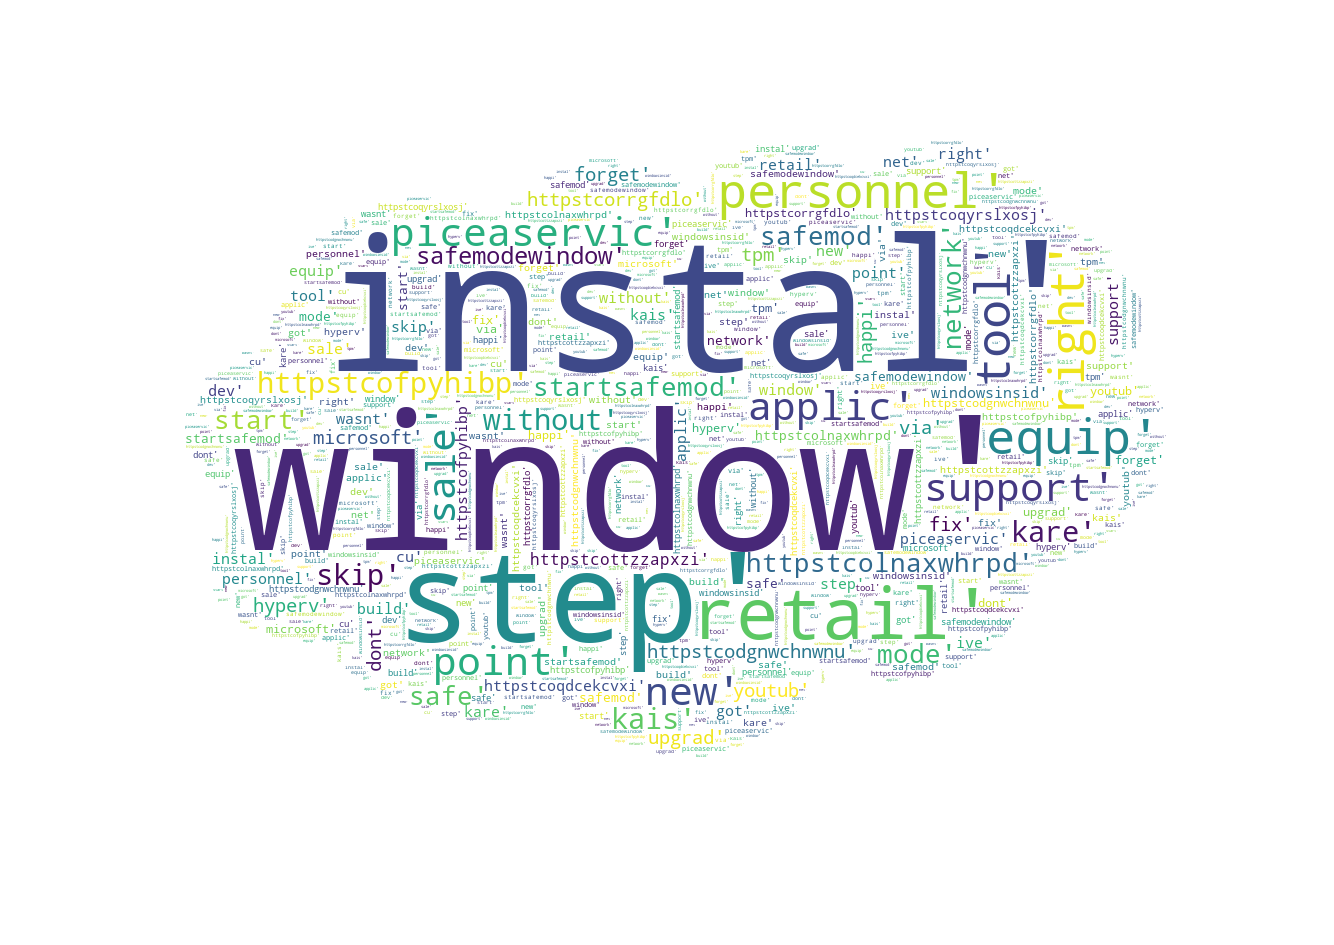

In [31]:
create_wordcloud(tweets["stemmed"].values)

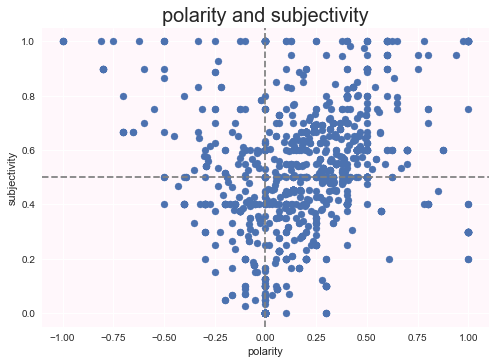

In [32]:
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(tweets.polarity,tweets.subjectivity)
plt.axvline(0, ls = '--', color = 'grey')
plt.axhline(0.5, ls = '--', color = 'grey')
plt.title('polarity and subjectivity', fontsize = 20)
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

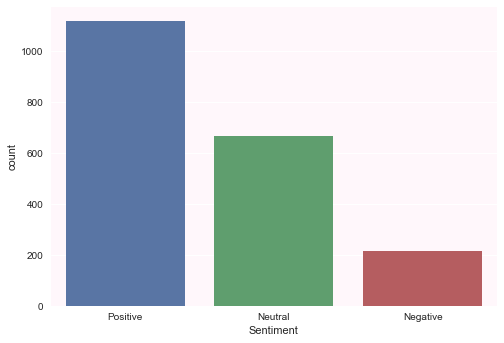

In [33]:
sns.countplot(tweets.Sentiment)

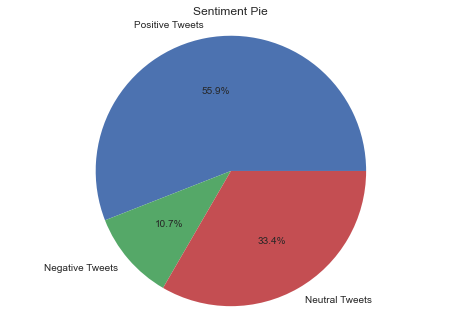

In [34]:
# percentage f all the tweets
pos_tweets = tweets[tweets['Sentiment']=='Positive']
pos_tweets = round(pos_tweets.shape[0] / tweets.shape[0] *100,1)

# percentage f all the tweets
neg_tweets = tweets[tweets['Sentiment']=='Negative']
neg_tweets = round(neg_tweets.shape[0] / tweets.shape[0] *100,1)

neu_tweets = tweets[tweets['Sentiment']=='Neutral']
neu_tweets = round(neu_tweets.shape[0] / tweets.shape[0] *100,1)

tweetpie = [pos_tweets,neg_tweets,neu_tweets]
labels = 'Positive Tweets','Negative Tweets','Neutral Tweets'
plt.pie(tweetpie,labels= labels,autopct='%1.1f%%')
plt.title('Sentiment Pie')
plt.axis('equal')
plt.show()

In [35]:
tweets.columns

Index(['tweetdata', 'username', 'location', 'processed_tweet', 'punct',
       'tokenized', 'stopwords', 'stemmed', 'subjectivity', 'polarity',
       'Sentiment', 'score'],
      dtype='object')

In [36]:
postw = pd.DataFrame(tweets.loc[(tweets['score']==1)])
negtw = pd.DataFrame(tweets.loc[(tweets['score']==-1)])
neutw = pd.DataFrame(tweets.loc[(tweets['score']==0)])

In [37]:
postw.head()


,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment,score
date-time,,,,,,,,,,,,
2021-11-17 08:04:14,Is your #retail personnel equipped with the right tools? #PiceaServices point of sale applications support the new… https://t.co/FP9y1h9iBP,Piceasoft,NaN,is your retail personnel equipped with the right tools piceaservices point of sale applications support the new,Is your retail personnel equipped with the right tools PiceaServices point of sale applications support the new… httpstcoFPyhiBP,"['is', 'your', 'retail', 'personnel', 'equipped', 'with', 'the', 'right', 'tools', 'piceaservices', 'point', 'of', 'sale', 'applications', 'support', 'the', 'new', 'httpstcofpyhibp']","['retail', 'personnel', 'equipped', 'right', 'tools', 'piceaservices', 'point', 'sale', 'applications', 'support', 'new', 'httpstcofpyhibp']","['retail', 'personnel', 'equip', 'right', 'tool', 'piceaservic', 'point', 'sale', 'applic', 'support', 'new', 'httpstcofpyhibp']",0.535714,0.285714,Positive,1
2021-11-17 08:01:49,✅ How To Start Windows 11 in Safe Mode With Networking\r\n#safemode #startsafemode #safemodewindows11… https://t.co/DgNWChNwNu,vikram0502,"New Delhi, India",how to start windows in safe mode with networking safemode startsafemode safemodewindows,✅ How To Start Windows in Safe Mode With Networking\r\nsafemode startsafemode safemodewindows… httpstcoDgNWChNwNu,"['', 'how', 'to', 'start', 'windows', 'in', 'safe', 'mode', 'with', 'networking', 'safemode', 'startsafemode', 'safemodewindows', 'httpstcodgnwchnwnu']","['', 'start', 'windows', 'safe', 'mode', 'networking', 'safemode', 'startsafemode', 'safemodewindows', 'httpstcodgnwchnwnu']","['', 'start', 'window', 'safe', 'mode', 'network', 'safemod', 'startsafemod', 'safemodewindow', 'httpstcodgnwchnwnu']",0.500000,0.500000,Positive,1
2021-11-17 08:00:19,#Windows11 snazzy new Store app starts rolling out to Windows 10 https://t.co/KaytdheKzl from @GoodGearGuide,TferThomas,"Brisbane, Australia",windows snazzy new store app starts rolling out to windows from,Windows snazzy new Store app starts rolling out to Windows httpstcoKaytdheKzl from GoodGearGuide,"['windows', 'snazzy', 'new', 'store', 'app', 'starts', 'rolling', 'out', 'to', 'windows', 'httpstcokaytdhekzl', 'from', 'goodgearguide']","['windows', 'snazzy', 'new', 'store', 'app', 'starts', 'rolling', 'windows', 'httpstcokaytdhekzl', 'goodgearguide']","['window', 'snazzi', 'new', 'store', 'app', 'start', 'roll', 'window', 'httpstcokaytdhekzl', 'goodgearguid']",0.454545,0.136364,Positive,1
2021-11-17 07:56:08,Boot my laptop in the morning. #windows11 happily changed my default browser back to @MicrosoftEdge. Without as muc… https://t.co/6gooIRhovN,sarcastictomcat,/dev/urandom,boot my laptop in the morning windows happily changed my default browser back to without as muc,Boot my laptop in the morning windows happily changed my default browser back to MicrosoftEdge Without as muc… httpstcogooIRhovN,"['boot', 'my', 'laptop', 'in', 'the', 'morning', 'windows', 'happily', 'changed', 'my', 'default', 'browser', 'back', 'to', 'microsoftedge', 'without', 'as', 'muc', 'httpstcogooirhovn']","['boot', 'laptop', 'morning', 'windows', 'happily', 'changed', 'default', 'browser', 'back', 'microsoftedge', 'without', 'muc', 'httpstcogooirhovn']","['boot', 'laptop', 'morn', 'window', 'happili', 'chang', 'default', 'browser', 'back', 'microsoftedg', 'without', 'muc', 'httpstcogooirhovn']",0.500000,0.400000,Positive,1
2021-11-17 07:54:12,"Microsoft will update Windows 10 with new features every year, matching Windows 11\r\nhttps://t.co/ui0G37OnYv… https://t.co/r3l1gjNZdf",tryingBot05,NY,microsoft will update windows with new features every year matching windows,Microsoft will update Windows with new features every year matching Windows \r\nhttpstcouiGOnYv… httpstcorlgjNZdf,"['microsoft', 'will', 'update', 'windows', 'with', 'new', 'features', 'every', 'year', 'matching', 'windows', 'httpstcouigonyv', 'httpstco

Word Cloud Saved Successfully


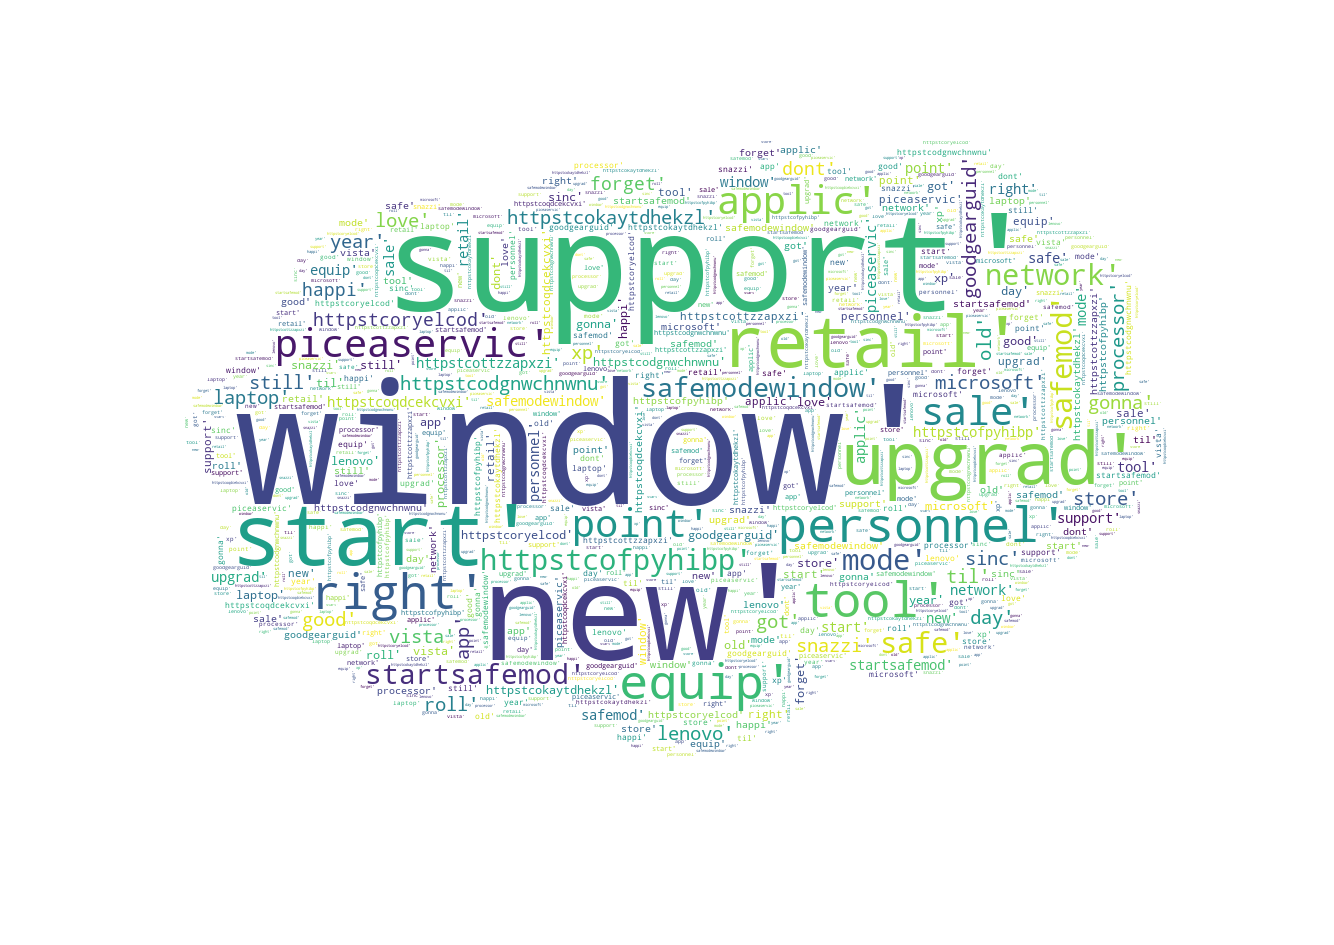

In [38]:
create_wordcloud(postw["stemmed"].values)

In [39]:
neutw.head()

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment,score
date-time,,,,,,,,,,,,
2021-11-17 08:03:14,✅ How To Install Windows 11 Step By Step Without Skipping | Windows 11 Install Kaise Kare\r\n#windows11… https://t.co/LnAXwhrP6D,vikram0502,"New Delhi, India",how to install windows step by step without skipping windows install kaise kare windows,✅ How To Install Windows Step By Step Without Skipping Windows Install Kaise Kare\r\nwindows… httpstcoLnAXwhrPD,"['', 'how', 'to', 'install', 'windows', 'step', 'by', 'step', 'without', 'skipping', 'windows', 'install', 'kaise', 'kare', 'windows', 'httpstcolnaxwhrpd']","['', 'install', 'windows', 'step', 'step', 'without', 'skipping', 'windows', 'install', 'kaise', 'kare', 'windows', 'httpstcolnaxwhrpd']","['', 'instal', 'window', 'step', 'step', 'without', 'skip', 'window', 'instal', 'kais', 'kare', 'window', 'httpstcolnaxwhrpd']",0.000000,0.0,Neutral,0
2021-11-17 08:00:01,✅ How To Sleep Windows 11 Computer or Laptop\r\n#sleep #sleepcomputer #sleepwindows11 #windows11 #VikramKumarSingh… https://t.co/OyOWiWonPK,vikram0502,"New Delhi, India",how to sleep windows computer or laptop sleep sleepcomputer sleepwindows windows vikramkumarsingh,✅ How To Sleep Windows Computer or Laptop\r\nsleep sleepcomputer sleepwindows windows VikramKumarSingh… httpstcoOyOWiWonPK,"['', 'how', 'to', 'sleep', 'windows', 'computer', 'or', 'laptop', 'sleep', 'sleepcomputer', 'sleepwindows', 'windows', 'vikramkumarsingh', 'httpstcooyowiwonpk']","['', 'sleep', 'windows', 'computer', 'laptop', 'sleep', 'sleepcomputer', 'sleepwindows', 'windows', 'vikramkumarsingh', 'httpstcooyowiwonpk']","['', 'sleep', 'window', 'comput', 'laptop', 'sleep', 'sleepcomput', 'sleepwindow', 'window', 'vikramkumarsingh', 'httpstcooyowiwonpk']",0.000000,0.0,Neutral,0
2021-11-17 07:58:29,✅ How To Setup Dynamic Lock To Automatically Lock Your Windows 11 PC When You Step Away\r\n#dynamiclock… https://t.co/mc9omAXzkT,vikram0502,"New Delhi, India",how to setup dynamic lock to automatically lock your windows pc when you step away dynamiclock,✅ How To Setup Dynamic Lock To Automatically Lock Your Windows PC When You Step Away\r\ndynamiclock… httpstcomcomAXzkT,"['', 'how', 'to', 'setup', 'dynamic', 'lock', 'to', 'automatically', 'lock', 'your', 'windows', 'pc', 'when', 'you', 'step', 'away', 'dynamiclock', 'httpstcomcomaxzkt']","['', 'setup', 'dynamic', 'lock', 'automatically', 'lock', 'windows', 'pc', 'step', 'away', 'dynamiclock', 'httpstcomcomaxzkt']","['', 'setup', 'dynam', 'lock', 'automat', 'lock', 'window', 'pc', 'step', 'away', 'dynamiclock', 'httpstcomcomaxzkt']",0.166667,0.0,Neutral,0
2021-11-17 07:56:55,✅ How To Remove Data Limit For Your WiFi On Your Windows 11 Laptop or Computer\r\n#wifidatalimit #removewifidatalimit… https://t.co/MZ6TQFAcrs,vikram0502,"New Delhi, India",how to remove data limit for your wifi on your windows laptop or computer wifidatalimit removewifidatalimit,✅ How To Remove Data Limit For Your WiFi On Your Windows Laptop or Computer\r\nwifidatalimit removewifidatalimit… httpstcoMZTQFAcrs,"['', 'how', 'to', 'remove', 'data', 'limit', 'for', 'your', 'wifi', 'on', 'your', 'windows', 'laptop', 'or', 'computer', 'wifidatalimit', 'removewifidatalimit', 'httpstcomztqfacrs']","['', 'remove', 'data', 'limit', 'wifi', 'windows', 'laptop', 'computer', 'wifidatalimit', 'removewifidatalimit', 'httpstcomztqfacrs']","['', 'remov', 'data', 'limit', 'wifi', 'window', 'laptop', 'comput', 'wifidatalimit', 'removewifidatalimit', 'httpstcomztqfacr']",0.000000,0.0,Neutral,0
2021-11-17 07:55:19,✅ How To Set Data Limit For WiFi And Ethernet in Windows 11 Laptop or Computer\r\n#wifidatalimit #ethernetdatalimit… https://t.co/FyYjQluRed,vikram0502,"New Delhi, India",how to set data limit for wifi and ethernet in windows laptop or computer wifidatalimit ethernetdatalimit,✅ How To Set Data Limit For WiFi And Ethernet in Windows Laptop or Computer\r\nwifidatalimit ethernetdatalimit… htt

Word Cloud Saved Successfully


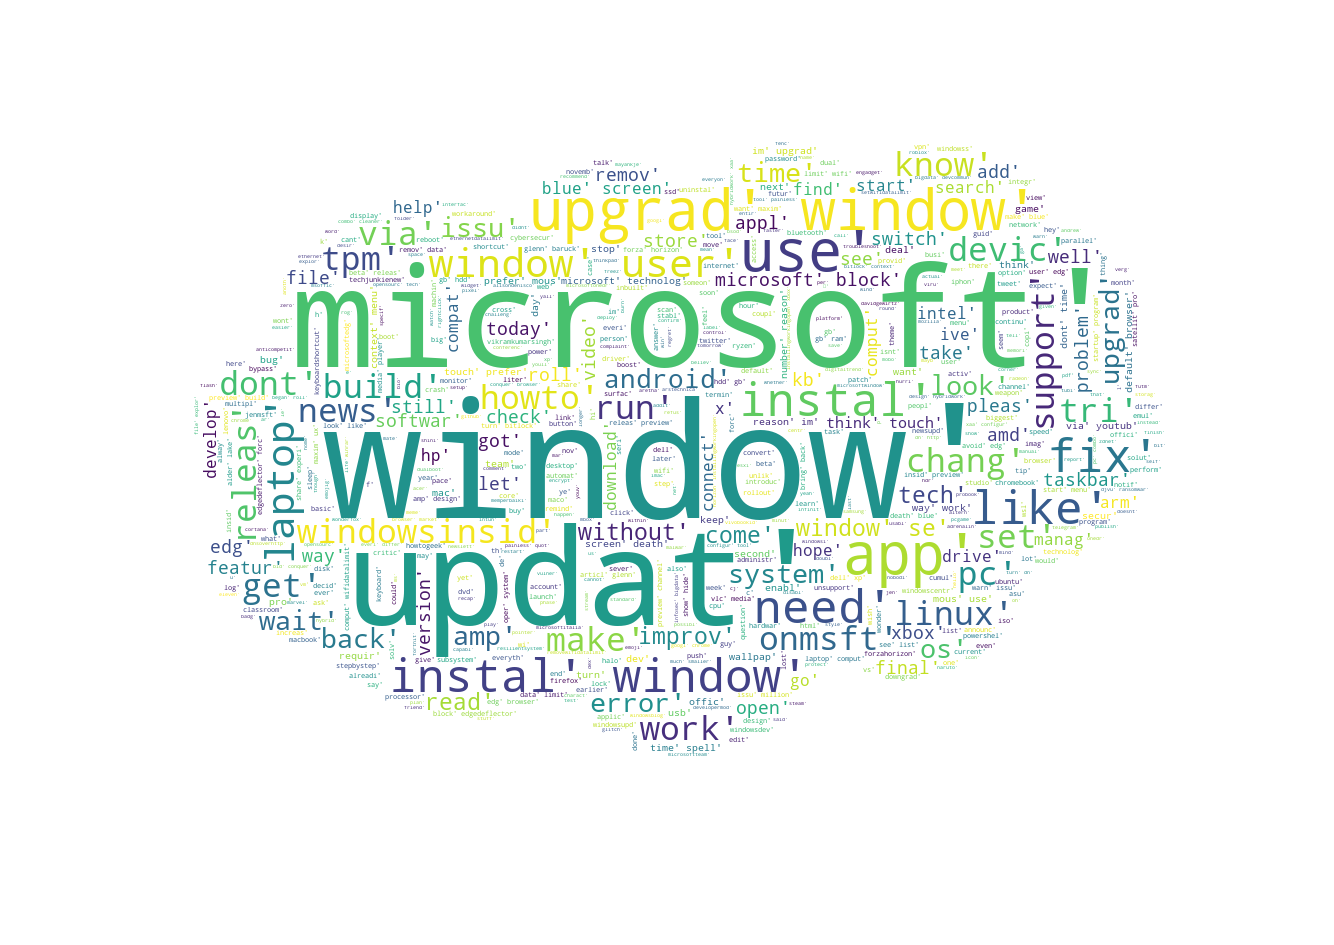

In [40]:
create_wordcloud(neutw["stemmed"].values)

In [41]:
negtw.head()

,tweetdata,username,location,processed_tweet,punct,tokenized,stopwords,stemmed,subjectivity,polarity,Sentiment,score
date-time,,,,,,,,,,,,
2021-11-17 08:00:03,"Declutter and dominate with Xbox Game Pass For PC on Windows 11. 💪\r\n\r\nWhen it comes to playing your way, Windows 11 m… https://t.co/0J1qtZhaBC",WindowsUK,UK,declutter and dominate with xbox game pass for pc on windows when it comes to playing your way windows,Declutter and dominate with Xbox Game Pass For PC on Windows 💪\r\n\r\nWhen it comes to playing your way Windows m… httpstcoJqtZhaBC,"['declutter', 'and', 'dominate', 'with', 'xbox', 'game', 'pass', 'for', 'pc', 'on', 'windows', 'when', 'it', 'comes', 'to', 'playing', 'your', 'way', 'windows', 'm', 'httpstcojqtzhabc']","['declutter', 'dominate', 'xbox', 'game', 'pass', 'pc', 'windows', 'comes', 'playing', 'way', 'windows', 'httpstcojqtzhabc']","['declutt', 'domin', 'xbox', 'game', 'pass', 'pc', 'window', 'come', 'play', 'way', 'window', 'httpstcojqtzhabc']",0.400000,-0.400000,Negative,-1
2021-11-17 06:35:58,The #Windows11 Black Screen of Death Is Turning Blue\r\n https://t.co/lZiq69GaLx,mallievi,Milan,the windows black screen of death is turning blue,The Windows Black Screen of Death Is Turning Blue\r\n httpstcolZiqGaLx,"['the', 'windows', 'black', 'screen', 'of', 'death', 'is', 'turning', 'blue', 'httpstcolziqgalx']","['windows', 'black', 'screen', 'death', 'turning', 'blue', 'httpstcolziqgalx']","['window', 'black', 'screen', 'death', 'turn', 'blue', 'httpstcolziqgalx']",0.266667,-0.083333,Negative,-1
2021-11-17 06:18:30,"With an upcoming update, @Microsoft is blocking third-party apps to deflect links to other browsers. Read on!… https://t.co/DrRYnpvsdQ",HTTech,"New Delhi, India",with an upcoming update is blocking third party apps to deflect links to other browsers read on,With an upcoming update Microsoft is blocking thirdparty apps to deflect links to other browsers Read on… httpstcoDrRYnpvsdQ,"['with', 'an', 'upcoming', 'update', 'microsoft', 'is', 'blocking', 'thirdparty', 'apps', 'to', 'deflect', 'links', 'to', 'other', 'browsers', 'read', 'on', 'httpstcodrrynpvsdq']","['upcoming', 'update', 'microsoft', 'blocking', 'thirdparty', 'apps', 'deflect', 'links', 'browsers', 'read', 'httpstcodrrynpvsdq']","['upcom', 'updat', 'microsoft', 'block', 'thirdparti', 'app', 'deflect', 'link', 'browser', 'read', 'httpstcodrrynpvsdq']",0.375000,-0.125000,Negative,-1
2021-11-17 05:45:00,Trying to run #VALORANT on #windows11 ... #late #climax https://t.co/gsnPAKvxAo,blacKF1reX,"Chicago, IL",trying to run valorant on windows late climax,Trying to run VALORANT on windows late climax httpstcogsnPAKvxAo,"['trying', 'to', 'run', 'valorant', 'on', 'windows', 'late', 'climax', 'httpstcogsnpakvxao']","['trying', 'run', 'valorant', 'windows', 'late', 'climax', 'httpstcogsnpakvxao']","['tri', 'run', 'valor', 'window', 'late', 'climax', 'httpstcogsnpakvxao']",0.600000,-0.300000,Negative,-1
2021-11-17 04:16:39,It's like Microsoft learned nothing from the 90s / IE monopoly lessons. #windows11 has the teams icon hard pinned… https://t.co/gDZm9VdBNp,dplattsf,SF,it like microsoft learned nothing from the ie monopoly lessons windows has the teams icon hard pinned,Its like Microsoft learned nothing from the s IE monopoly lessons windows has the teams icon hard pinned… httpstcogDZmVdBNp,"['its', 'like', 'microsoft', 'learned', 'nothing', 'from', 'the', 's', 'ie', 'monopoly', 'lessons', 'windows', 'has', 'the', 'teams', 'icon', 'hard', 'pinned', 'httpstcogdzmvdbnp']","['like', 'microsoft', 'learned', 'nothing', 'ie', 'monopoly', 'lessons', 'windows', 'teams', 'icon', 'hard', 'pinned', 'httpstcogdzmvdbnp']","['like', 'microsoft', 'learn', 'noth', 'ie', 'monopoli', 'lesson', 'window', 'team', 'icon', 'hard', 'pin', 'httpstcogdzmvdbnp']",0.541667,-0.291667,Negative,-1


Word Cloud Saved Successfully


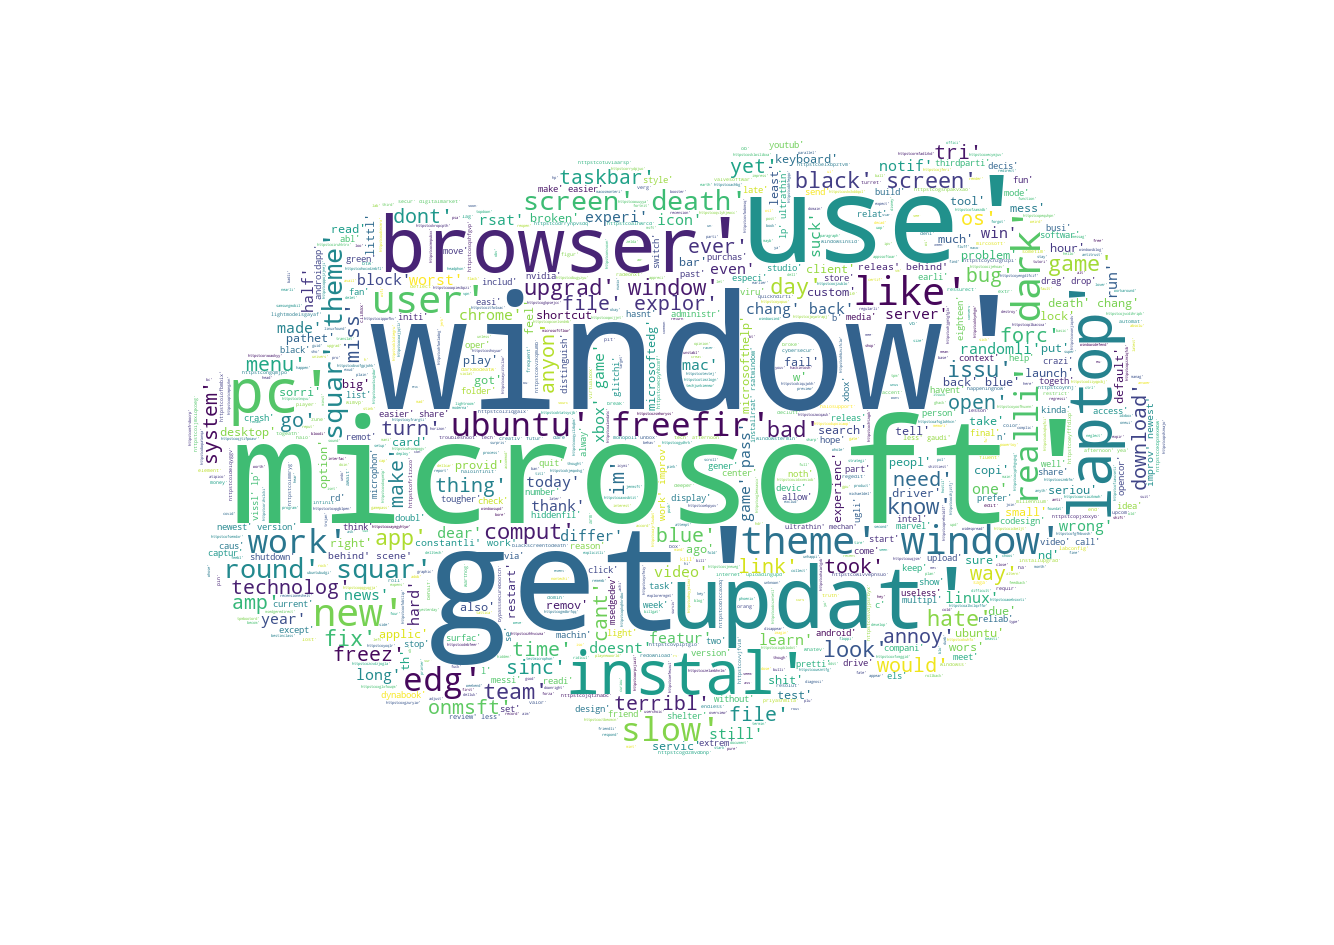

In [42]:
create_wordcloud(negtw["stemmed"].values)

### Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_tweet'])  
final_vectorized_data

<2000x16247 sparse matrix of type '<class 'numpy.int64'>'
	with 52868 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data['score'],
                                                    test_size=0.2, random_state=69) 

In [45]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1600, 16247)
X_test_shape :  (400, 16247)
y_train_shape :  (1600,)
y_test_shape :  (400,)


### Using Nave Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
score_naive = accuracy_score(predicted_naive, y_test)*100


### Using Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [49]:
clf.fit(X_train, y_train)
pre = clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
scores = accuracy_score(pre, y_test)*100


### Using Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [52]:
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predicted, y_test)*100


### Using SVM 

In [54]:
from sklearn import svm
svm = svm.SVC()

In [55]:
svm.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
scorek = accuracy_score(predicted, y_test)*100


### Accuracy 

In [57]:
print("Accuracy with Logistic Regression: ",scores)
print("Accuracy with Naive-bayes: ",score_naive)
print("Accuracy with DecisionTreeClassifier: ",score)
print("Accuracy with SVM: ",scorek)

Accuracy with Logistic Regression:  78.0
Accuracy with Naive-bayes:  72.25
Accuracy with DecisionTreeClassifier:  75.75
Accuracy with SVM:  75.75


## Conclusion

### We have analysed the sentiment of tweets related to #Windows11. We have classified each and every tweet's sentiments as positive, negative and neutral. The project focuses on analyzing the sentiments of the tweets and feeding the data to a machine learning model in order to train it and then check its accuracy, so that we can use this model for future use according to the results. It comprises of steps like data collection, text pre-processing, sentiment detection, sentiment classification, training and testing the model. 

### From this we can conclude majority of users are positive and neutral towards our target subject and majority of the opinions are personal rather than factual. As we also tried to check how accurate the classifications were done we found logistic regression has better performance in our classification with accuracy scores.


